## Problem Statement

### Business Context

Airbnb is an online platform that allows people to rent short-term accommodation. This ranges from regular people with a spare bedroom to property management firms who lease multiple rentals. On the one side, Airbnb enables owners to list their space and earn rental money. On the other side, it provides travelers easy access to renting private homes.

Airbnb receives commissions from two sources upon every booking, namely from the hosts and guests. For every booking, Airbnb charges the guest 6-12% of the booking fee. Moreover, Airbnb charges the host 3% for every successful transaction.

As a senior data scientist at Airbnb, you have to come up with a pricing model that can effectively predict the Rent for accommodation and can help hosts, travelers, and also the business in devising profitable strategies.

### Objective

To explore and visualize the data, build a linear regression model to predict the prices of Airbnb rental rooms, and generate a set of insights and recommendations that will help the business.

### Data Description

The data contains information about the different types of rental rooms offered by Airbnb over a fixed period of time. The detailed data dictionary is given below.

**Data Dictionary**

- id: Property ID
- room_type: Type of Room in the property
- accommodates: How many adults can this property accommodate
- bathrooms: Number of bathrooms on the property
- cancellation_policy: Cancellation policy of the property
- cleaning_fee: This denotes whether the property cleaning fee is included in the rent or not
- instant_bookable: It indicates whether an instant booking facility is available or not
- review_scores_rating: Review rating score of the property
- bedrooms: Number of bedrooms in the property
- beds: Total number of beds in the property
- log_price: Log of the rental price of the property for a fixed period. [If the price is 12000 dollars, then log_price represents log(12000)]

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.

* Blanks '_______' are provided in the notebook that need to be filled with an appropriate code to get the correct result

* With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space

* Identify the task to be performed correctly and only then proceed to write the required code

* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code"

* Running incomplete code may throw an error

* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors

* Add the results/observations derived from the analysis in the presentation and submit the same in .pdf format

## Importing necessary libraries

In [2]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user 



**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")  

## Loading the dataset

In [ ]:
# uncomment the following lines if Google Colab is being used
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# loading the dataset
data = pd.read_csv("AirBNB-1.csv")   

## Data Overview

### Displaying the first few rows of the dataset

In [8]:
data.shape ## Complete the code to get the shape of data   

(74111, 11)

### Checking the shape of the dataset

In [10]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  

There are 74111 rows and 11 columns.


### Checking 10 random rows of the dataset

In [12]:
# let's view a sample of the data
data.sample(n=10, random_state=1)    

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
56850,13586614,Entire home/apt,5.0,2.0,strict,False,f,100.0,2.0,3.0,7.408531
68140,18222981,Private room,3.0,1.0,strict,True,f,95.0,1.0,2.0,4.605170
23189,13915528,Entire home/apt,2.0,1.0,strict,True,f,95.0,1.0,2.0,4.094345
47255,7122067,Private room,1.0,1.0,flexible,False,f,100.0,1.0,1.0,4.317488
45933,12384924,Entire home/apt,5.0,2.0,strict,True,f,95.0,2.0,3.0,5.433722
66955,3999628,Private room,2.0,1.0,moderate,True,f,98.0,1.0,1.0,5.010635
18553,4948442,Entire home/apt,1.0,1.0,strict,False,f,NaN,0.0,1.0,5.010635
26117,666837,Shared room,16.0,2.0,flexible,False,f,76.0,1.0,1.0,2.708050
65737,15929932,Entire home/apt,10.0,1.0,strict,False,f,93.0,2.0,2.0,4.976734
8915,21173263,Entire home/apt,3.0,1.0,strict,True,f,95.0,0.0,2.0,4.700480


In [14]:
# drop the id column as it does not add any value to the analysis
data.drop("id", axis=1, inplace=True)  

In [16]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()  

### Checking the data types of the columns for the dataset

In [18]:
# checking column datatypes and number of non-null values
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


### Checking for duplicate values

In [24]:
df.duplicated() ## Complete the code to check duplicate entries in the data

0        False
1        False
2        False
3        False
4        False
         ...  
74106     True
74107    False
74108    False
74109    False
74110    False
Length: 74111, dtype: bool

In [26]:
df.drop_duplicates(inplace=True)
df.shape   

(54117, 10)

### Statistical summary of the dataset

In [28]:
df.describe() ## Complete the code to print the statistical summary of the data

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,54114.000000,53922.000000,43902.000000,54025.000000,53992.000000,54117.000000
mean,3.525982,1.304829,93.202041,1.363258,1.917710,4.865796
std,2.343854,0.651167,8.382243,0.951493,1.384241,0.755754
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,90.000000,1.000000,1.000000,4.369448
50%,3.000000,1.000000,95.000000,1.000000,1.000000,4.828314
75%,4.000000,1.500000,99.000000,2.000000,2.000000,5.298317
max,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


**Let's check the unique values for categorical variables.**

In [30]:
# list of all categorical variables
cat_col = df.select_dtypes(include="object").columns.tolist()

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)  

Entire home/apt    33854
Private room       18413
Shared room         1845
Name: room_type, dtype: int64
--------------------------------------------------
strict      25213
flexible    14569
moderate    14327
Name: cancellation_policy, dtype: int64
--------------------------------------------------
True     40348
False    13765
Name: cleaning_fee, dtype: int64
--------------------------------------------------
f    37838
t    16279
Name: instant_bookable, dtype: int64
--------------------------------------------------


**Let's convert the values of '*instant_bookable*' from '*f*' and '*t*' to boolean.**

In [34]:
df.instant_bookable.replace(["f", "t"], [False, True], inplace=True)     

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>


**The below functions need to be defined to carry out the Exploratory Data Analysis.**

In [36]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot   


In [38]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram    

### Univariate Analysis

***log_price* (the target variable)**

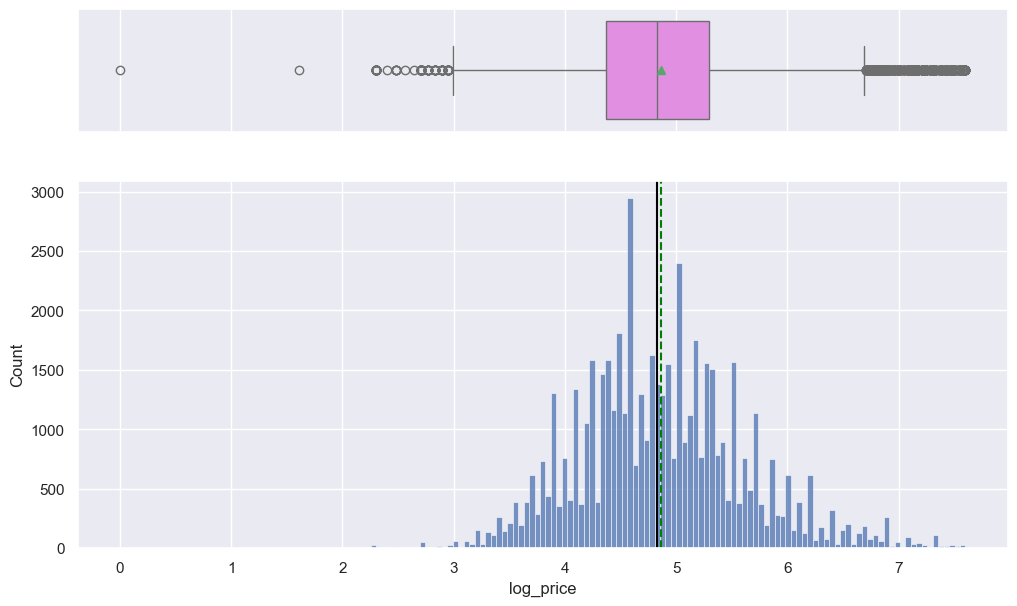

In [40]:
histogram_boxplot(df, "log_price")    

**Actual rental price**

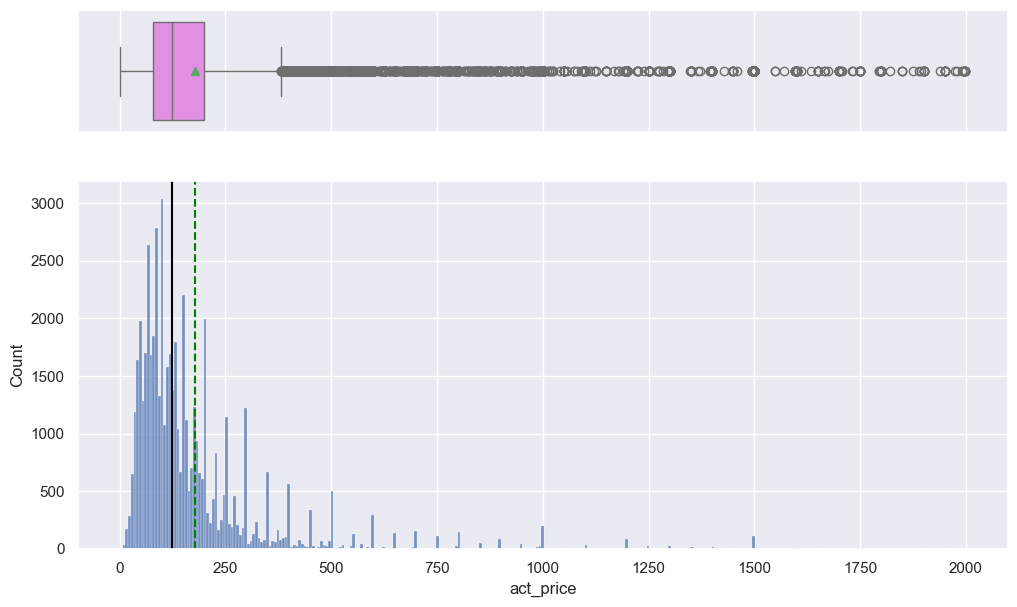

In [52]:
df["act_price"] = np.exp(df["log_price"])
histogram_boxplot(df, 'act_price')  ## Complete the code to create histogram_boxplot for 'act_price'  

In [54]:
# drop the act_price column
df.drop("act_price", axis=1, inplace=True)  

***review_scores_rating***

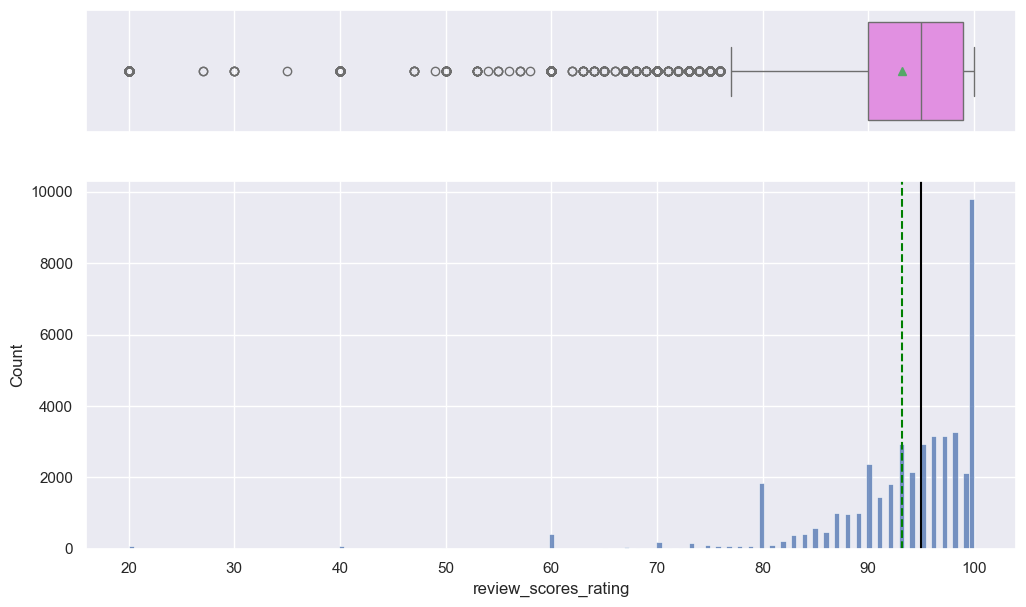

In [56]:
histogram_boxplot(df, 'review_scores_rating')  ## Complete the code to create histogram_boxplot for 'review_scores_rating'    

***beds***

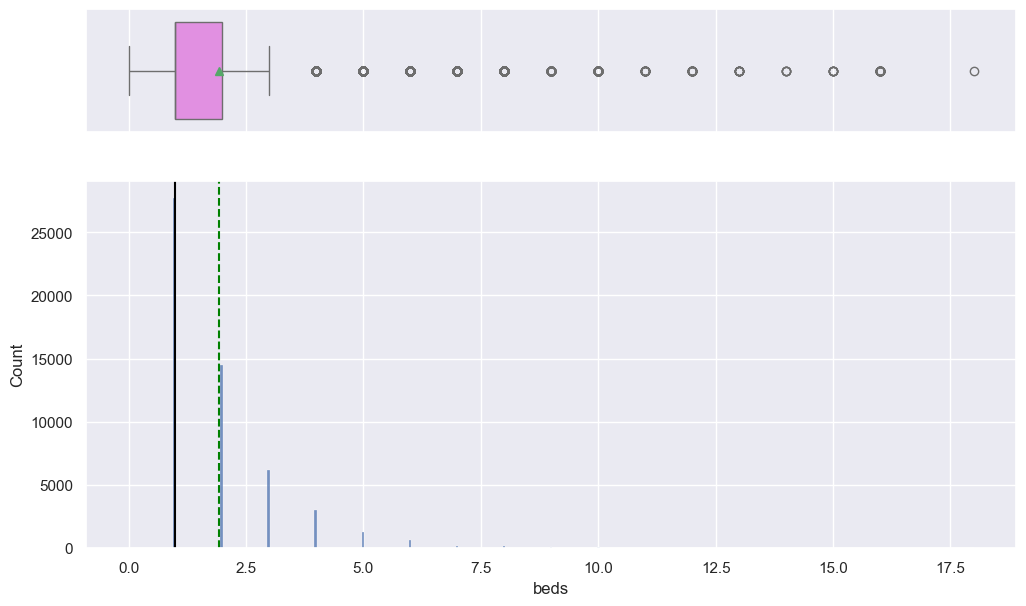

In [58]:
histogram_boxplot(df, 'beds')  ## Complete the code to create histogram_boxplot for 'beds'   

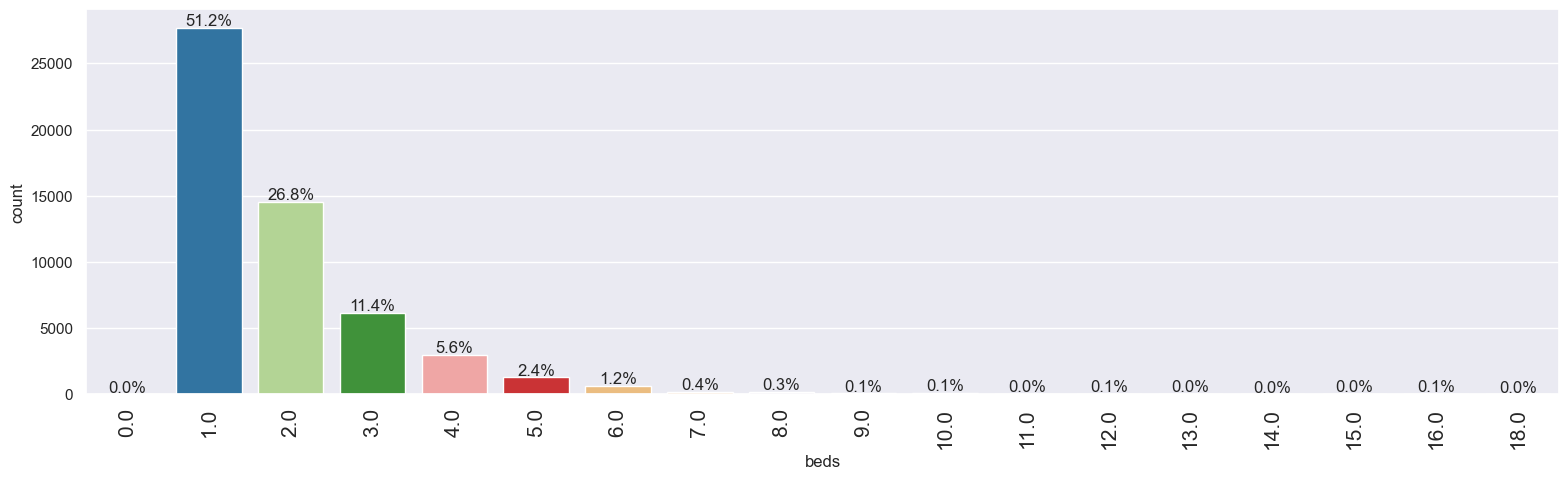

In [60]:
labeled_barplot(df, "beds", perc=True)    

***bedrooms***

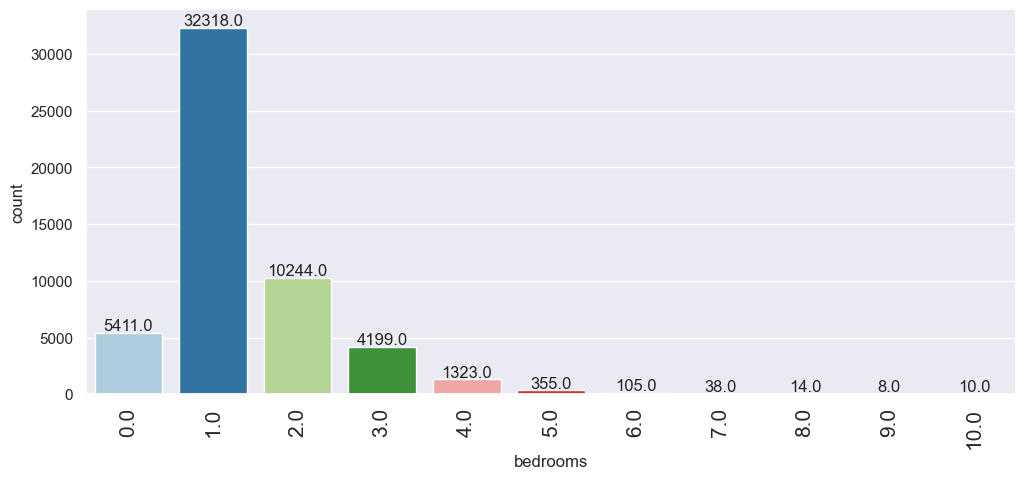

In [62]:
labeled_barplot(df, 'bedrooms') ## Complete the code to create labeled_barplot for 'bedrooms' 

***bathrooms***

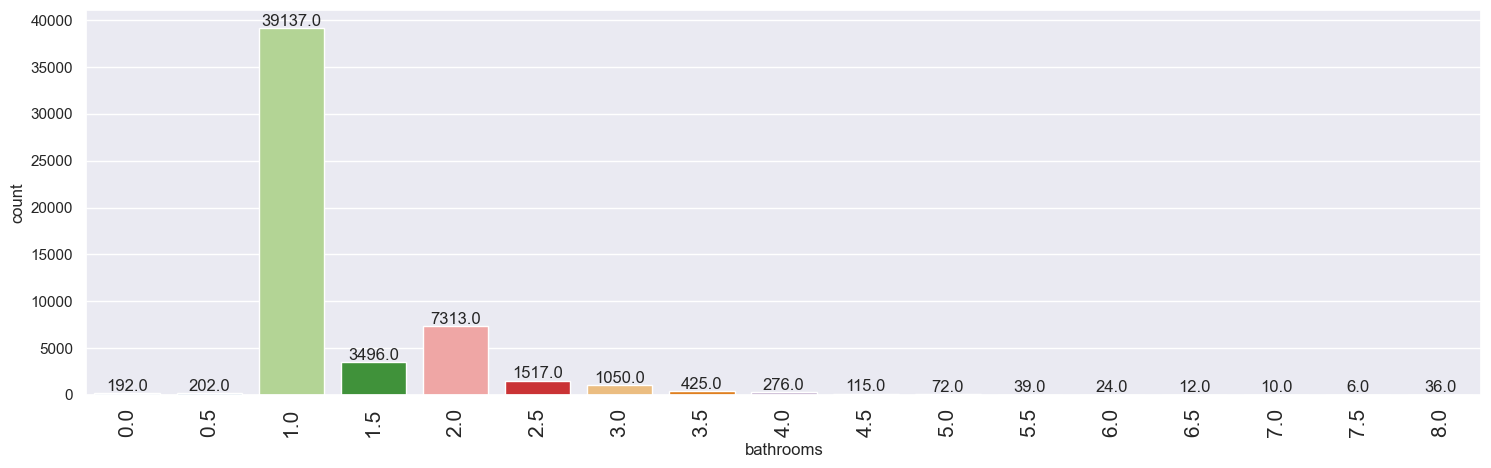

In [64]:
labeled_barplot(df, "bathrooms" ) ## Complete the code to create labeled_barplot for 'bathrooms' 

***accommodates***

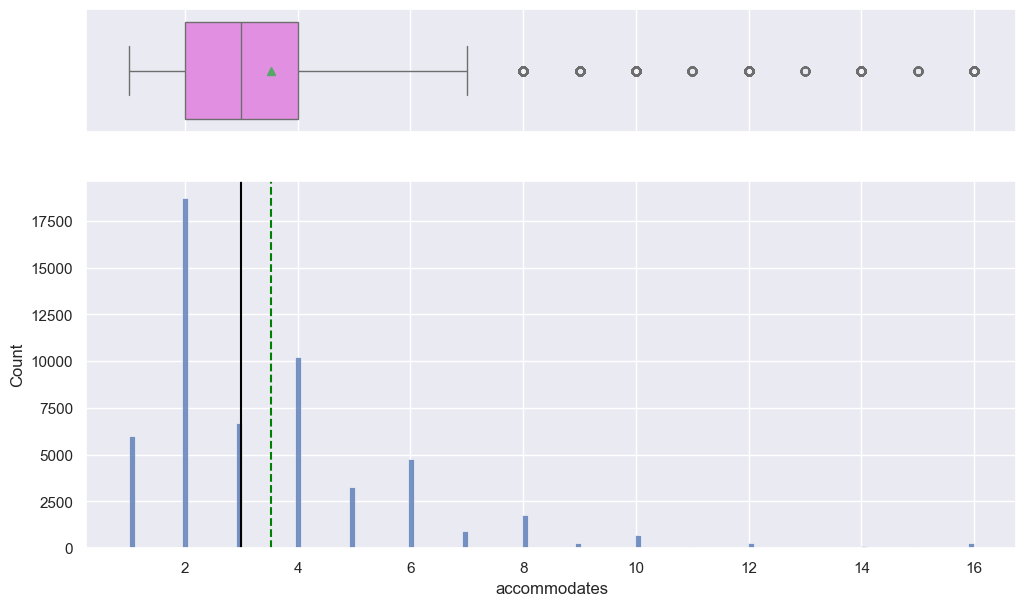

In [68]:
histogram_boxplot(df, "accommodates" )  ## Complete the code to create histogram_boxplot for 'accommodates' 

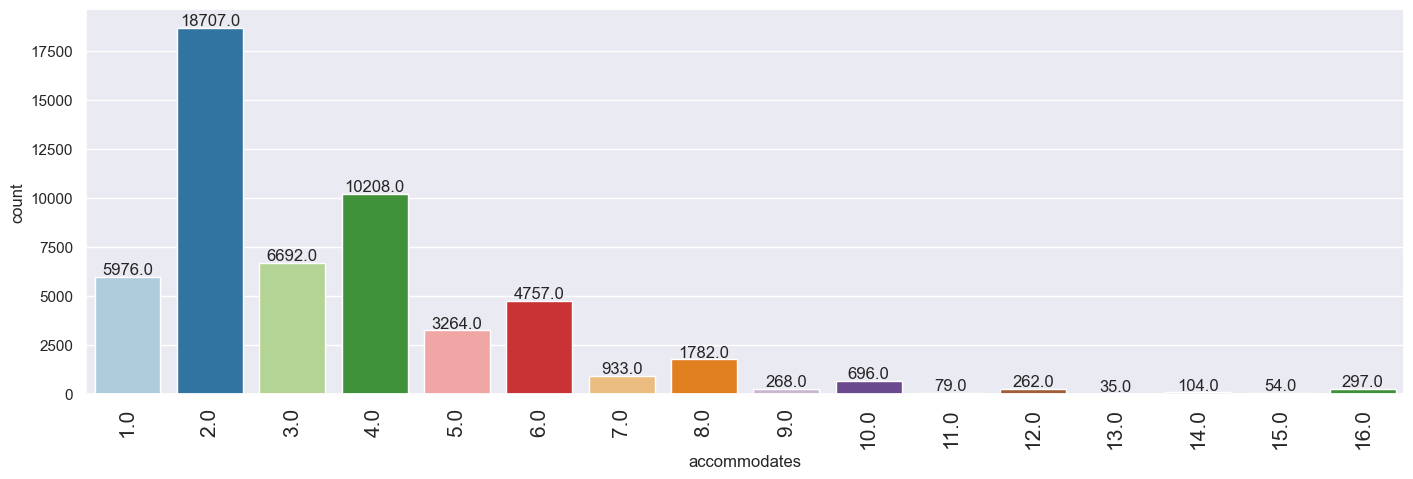

In [72]:
labeled_barplot(df, 'accommodates') ## Complete the code to create labeled_barplot for 'accommodates'     

***room_type***

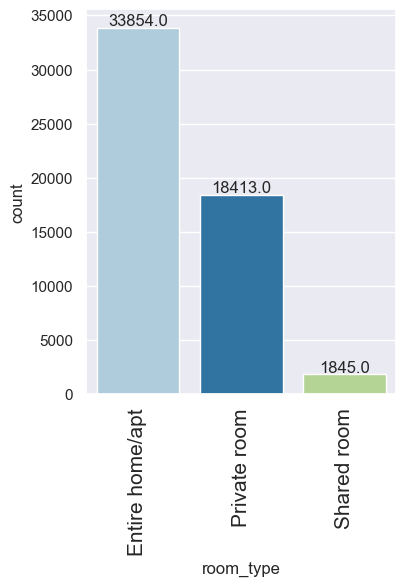

In [74]:
labeled_barplot(df, 'room_type') ## Complete the code to create labeled_barplot for 'room_type'  

***cancellation_policy***

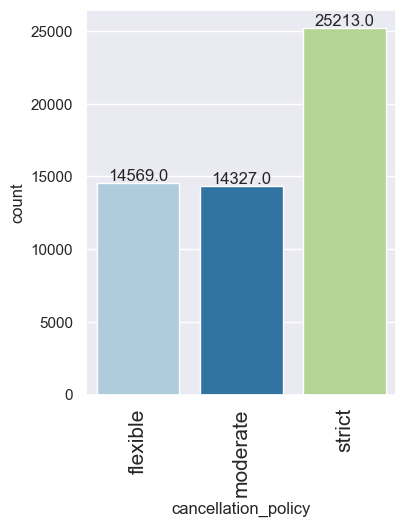

In [76]:
labeled_barplot(df, 'cancellation_policy') ## Complete the code to create labeled_barplot for 'cancellation_policy'  

***cleaning_fee***

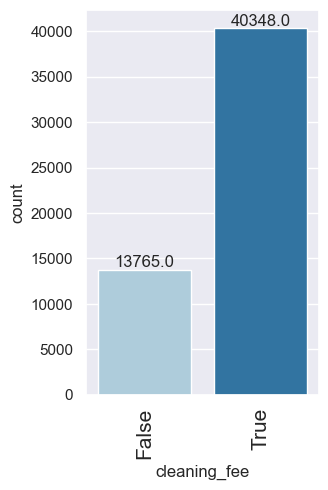

In [78]:
labeled_barplot(df, 'cleaning_fee') ## Complete the code to create labeled_barplot for 'cleaning_fee' 

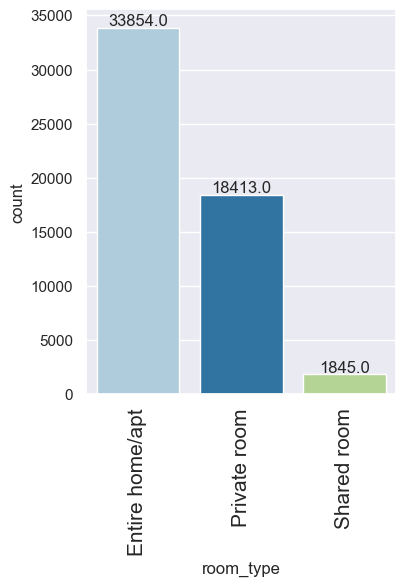

In [74]:
labeled_barplot(df, 'room_type') ## Complete the code to create labeled_barplot for 'room_type'  

***instant_bookable***

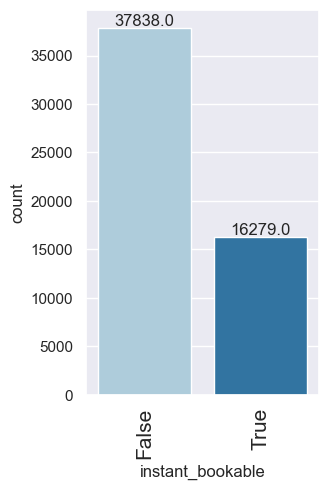

In [80]:
labeled_barplot(df, 'instant_bookable') ## Complete the code to create labeled_barplot for 'instant_bookable' 

## Bivariate Analysis

**Let's check the correlation between numerical columns.**

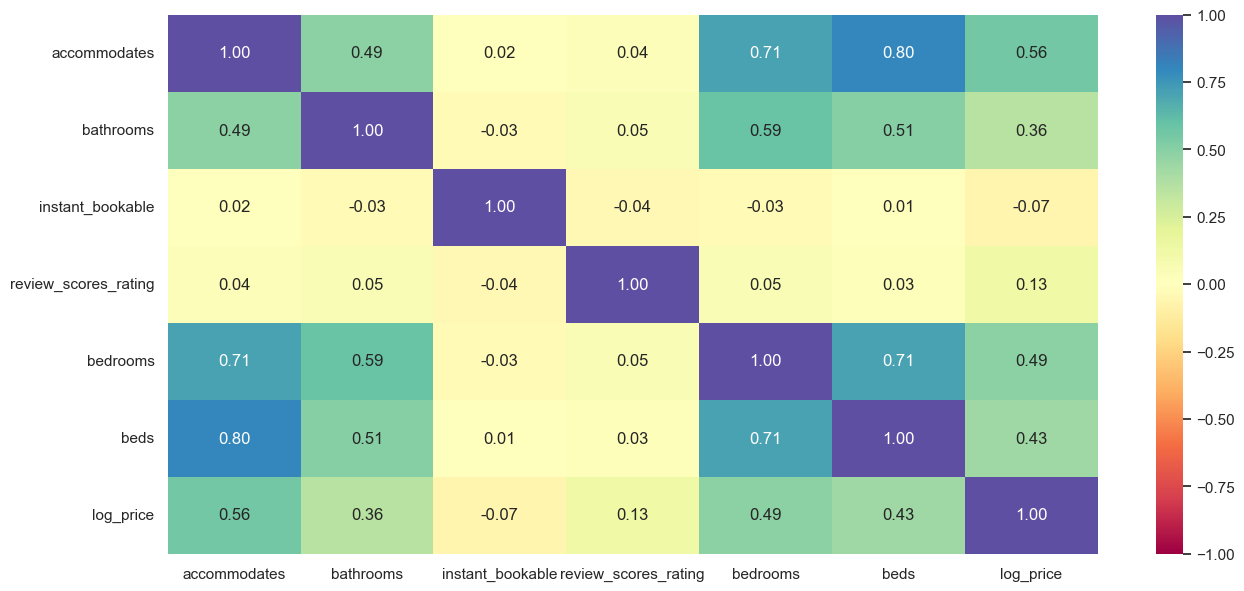

In [82]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()     

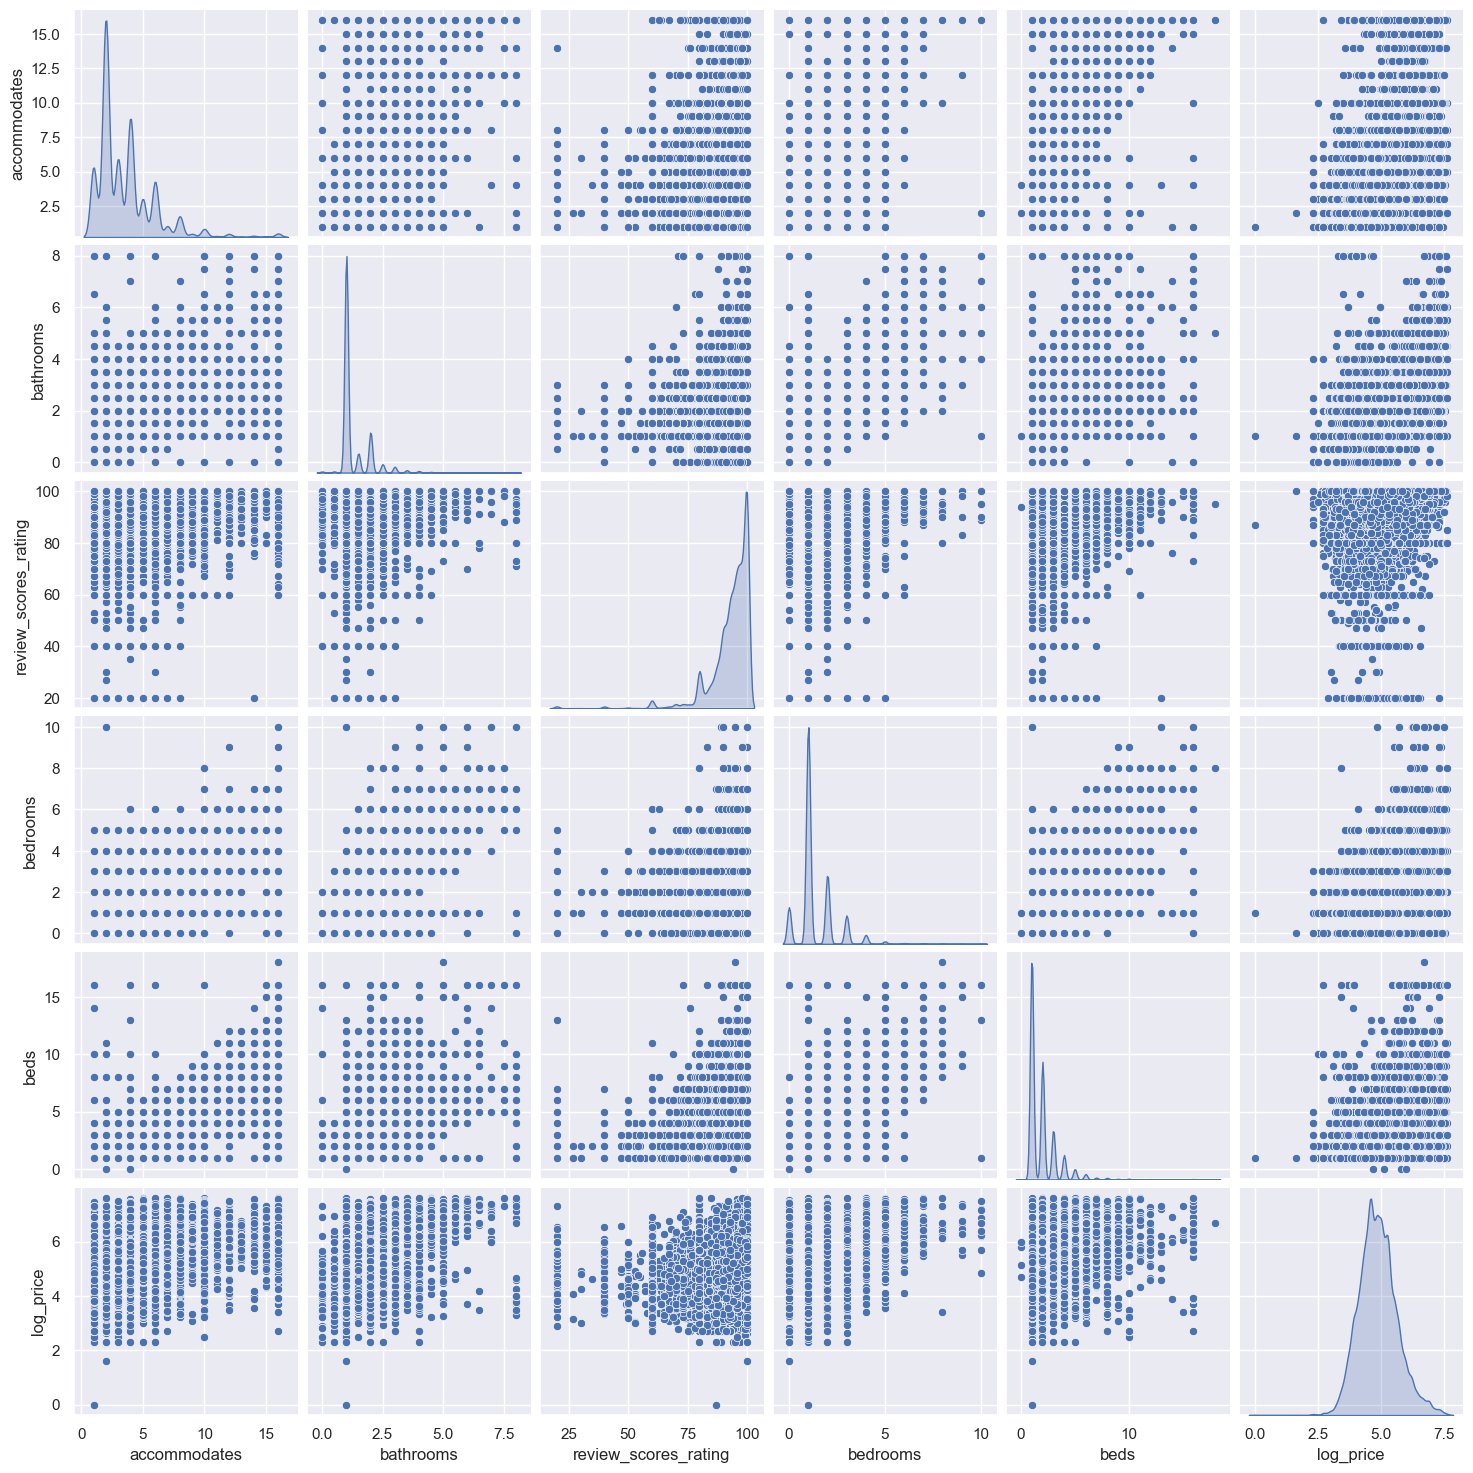

In [84]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
sns.pairplot(data=df[numeric_columns], diag_kind="kde")
plt.show()    

**Let's check the variation in *log_price* with some of the other variables.**

***accommodates* vs *log price***

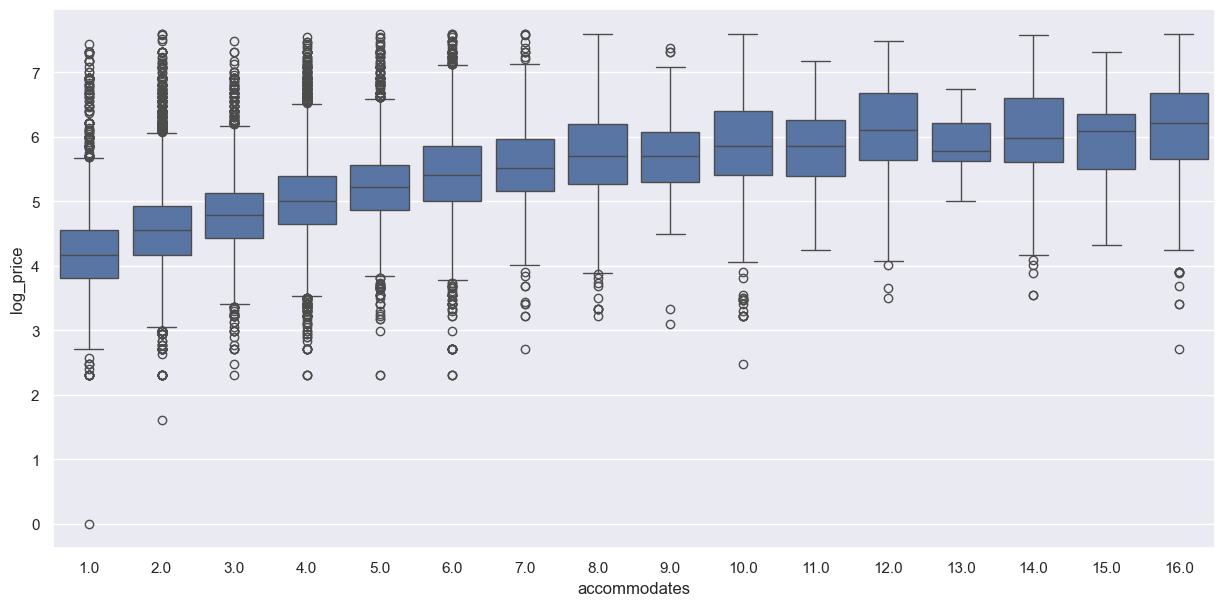

In [86]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="accommodates", y="log_price", data=df)
plt.show()    

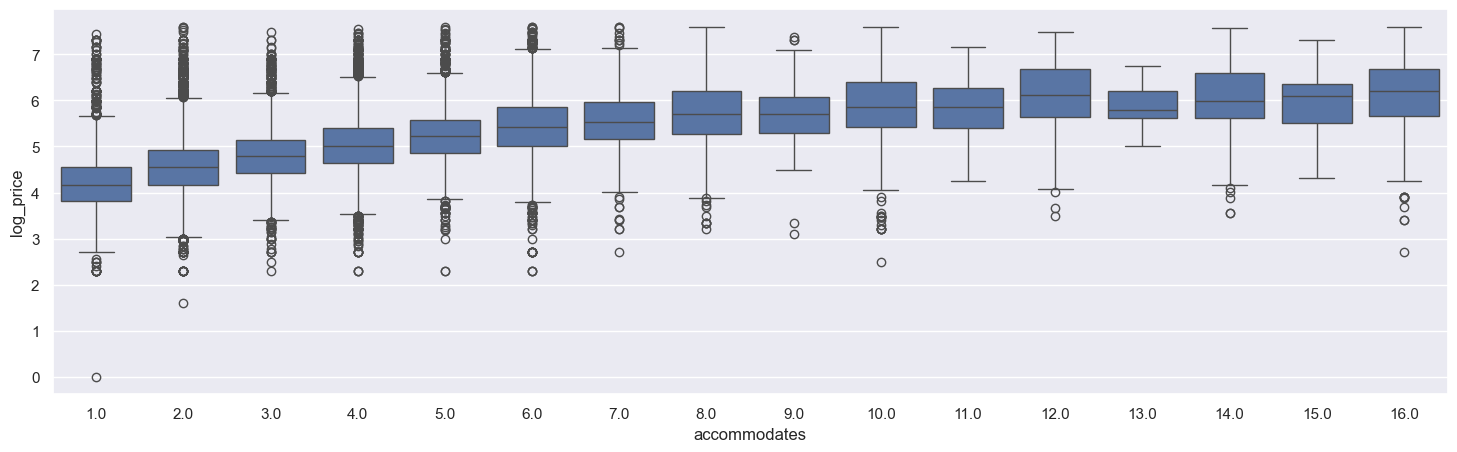

In [88]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="accommodates", y="log_price", data=df) ## Complete the code to create a boxplot for 'accommodates' and 'log_price'
plt.show()  

***bedrooms* vs *log_price***

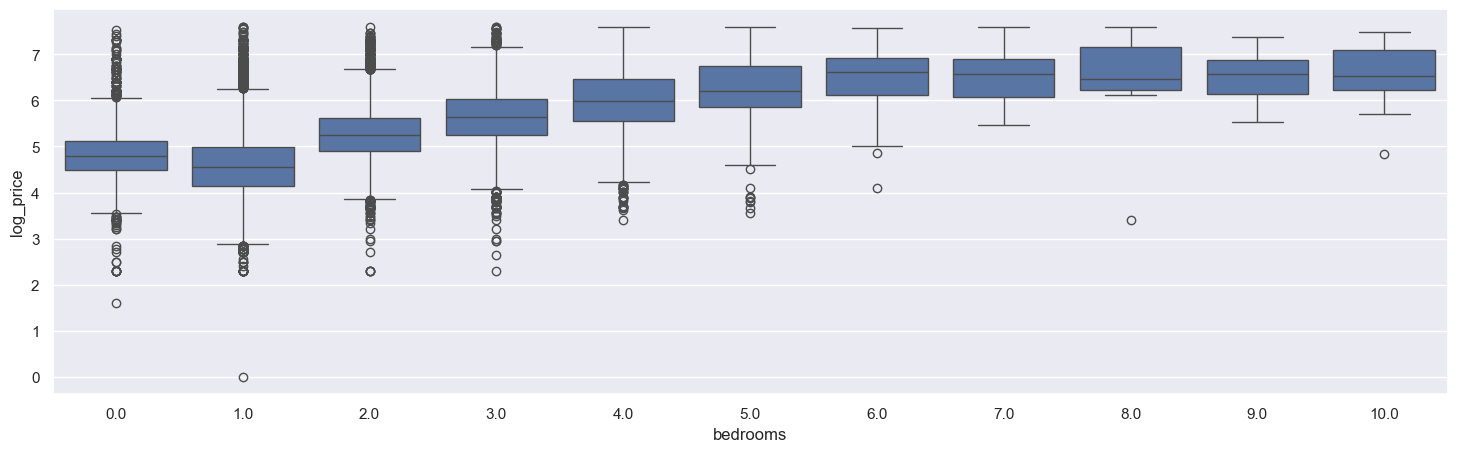

In [90]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="bedrooms", y="log_price", data=df) ## Complete the code to create a boxplot for 'bedrooms' and 'log_price'
plt.show()  

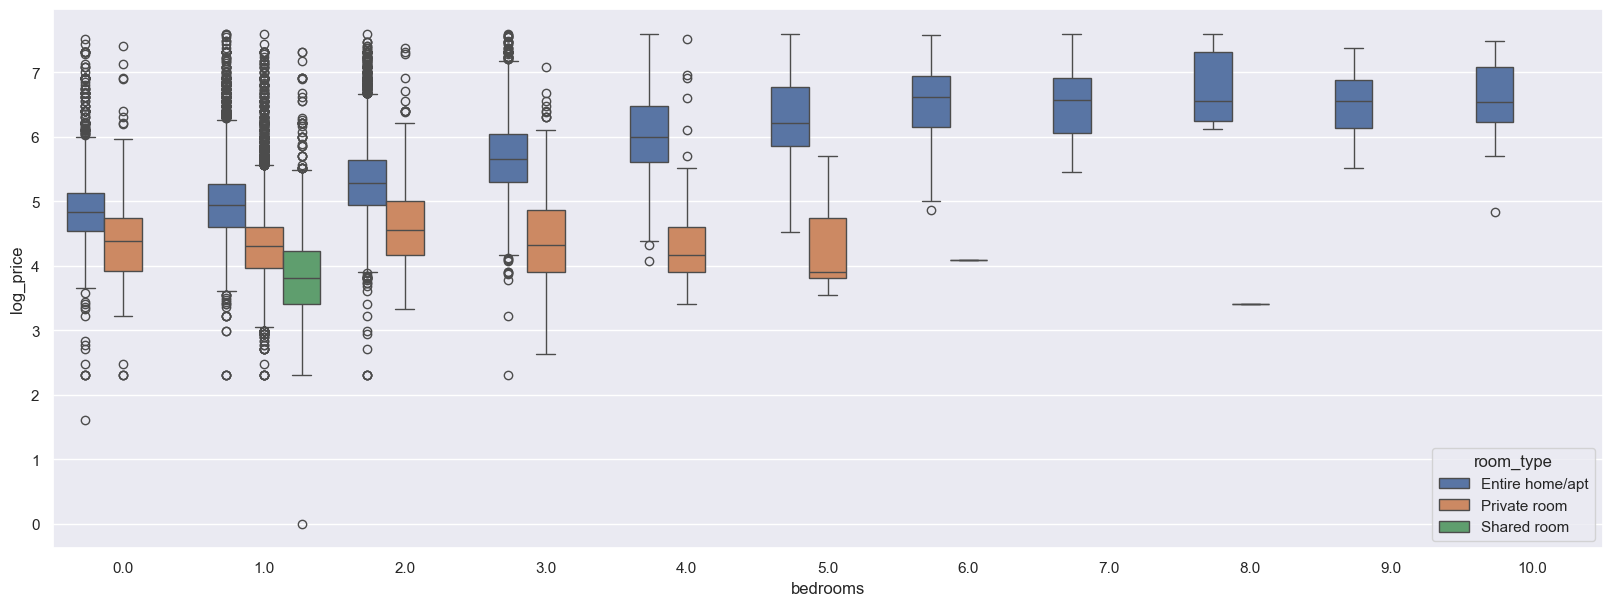

In [92]:
plt.figure(figsize=(20, 7))
sns.boxplot(x="bedrooms", y="log_price", data=df, hue="room_type")
plt.show()   

## Data Preprocessing

### Missing Value Treatment

In [94]:
df.isnull().sum()    

room_type                   5
accommodates                3
bathrooms                 195
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    10215
bedrooms                   92
beds                      125
log_price                   0
dtype: int64

In [98]:
# list of columns for which missing values will be dropped
nonnumeric_columns = df.select_dtypes(exclude=np.number).columns
df.dropna(subset=nonnumeric_columns, inplace=True)      

In [100]:
df.isnull().sum()   

room_type                   0
accommodates                0
bathrooms                 192
cancellation_policy         0
cleaning_fee                0
instant_bookable            0
review_scores_rating    10211
bedrooms                   92
beds                      125
log_price                   0
dtype: int64

In [102]:
# list of columns for which missing values will be imputed
numeric_columns.remove("log_price")

df[numeric_columns] = df.groupby(["room_type"])[numeric_columns].transform(
    lambda x: x.fillna(x.median())
) # complete the code to impute missing values in numerical columns with median grouped by room_type 

In [104]:
df.isnull().sum() # check the number of missing values  

room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

In [106]:
df.describe(include="all").T   

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
room_type,54104,3,Entire home/apt,33848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,54104.0,NaN,NaN,NaN,3.52619,2.343964,1.0,2.0,3.0,4.0,16.0
bathrooms,54104.0,NaN,NaN,NaN,1.303776,0.650292,0.0,1.0,1.0,1.5,8.0
cancellation_policy,54104,3,strict,25211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,54104,2,True,40342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,54104,2,False,37828,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,54104.0,NaN,NaN,NaN,93.648917,7.611323,20.0,92.0,96.0,98.0,100.0
bedrooms,54104.0,NaN,NaN,NaN,1.362746,0.950863,0.0,1.0,1.0,2.0,10.0
beds,54104.0,NaN,NaN,NaN,1.916254,1.383276,0.0,1.0,1.0,2.0,18.0
log_price,54104.0,NaN,NaN,NaN,4.865802,0.75579,0.0,4.369448,4.828314,5.298317,7.600402


In [108]:
# adding small positive value to log_price
eps = 1e-06
df["log_price"] = df["log_price"] + eps

df["log_price"].describe()     

count    54104.000000
mean         4.865803
std          0.755790
min          0.000001
25%          4.369449
50%          4.828315
75%          5.298318
max          7.600403
Name: log_price, dtype: float64

In [114]:
bool_cols = ["cleaning_fee", "instant_bookable"]
df[bool_cols] = df[bool_cols].astype(int) # complete the code to convert the boolean columns to integer type
 
df.head()   

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1,0,100.0,1.0,1.0,5.010636
1,Entire home/apt,7.0,1.0,strict,1,1,93.0,3.0,3.0,5.129900
2,Entire home/apt,5.0,1.0,moderate,1,1,92.0,1.0,3.0,4.976735
3,Entire home/apt,4.0,1.0,flexible,1,0,96.0,2.0,2.0,6.620074
4,Entire home/apt,2.0,1.0,moderate,1,1,40.0,0.0,1.0,4.744933


### Outlier Detection

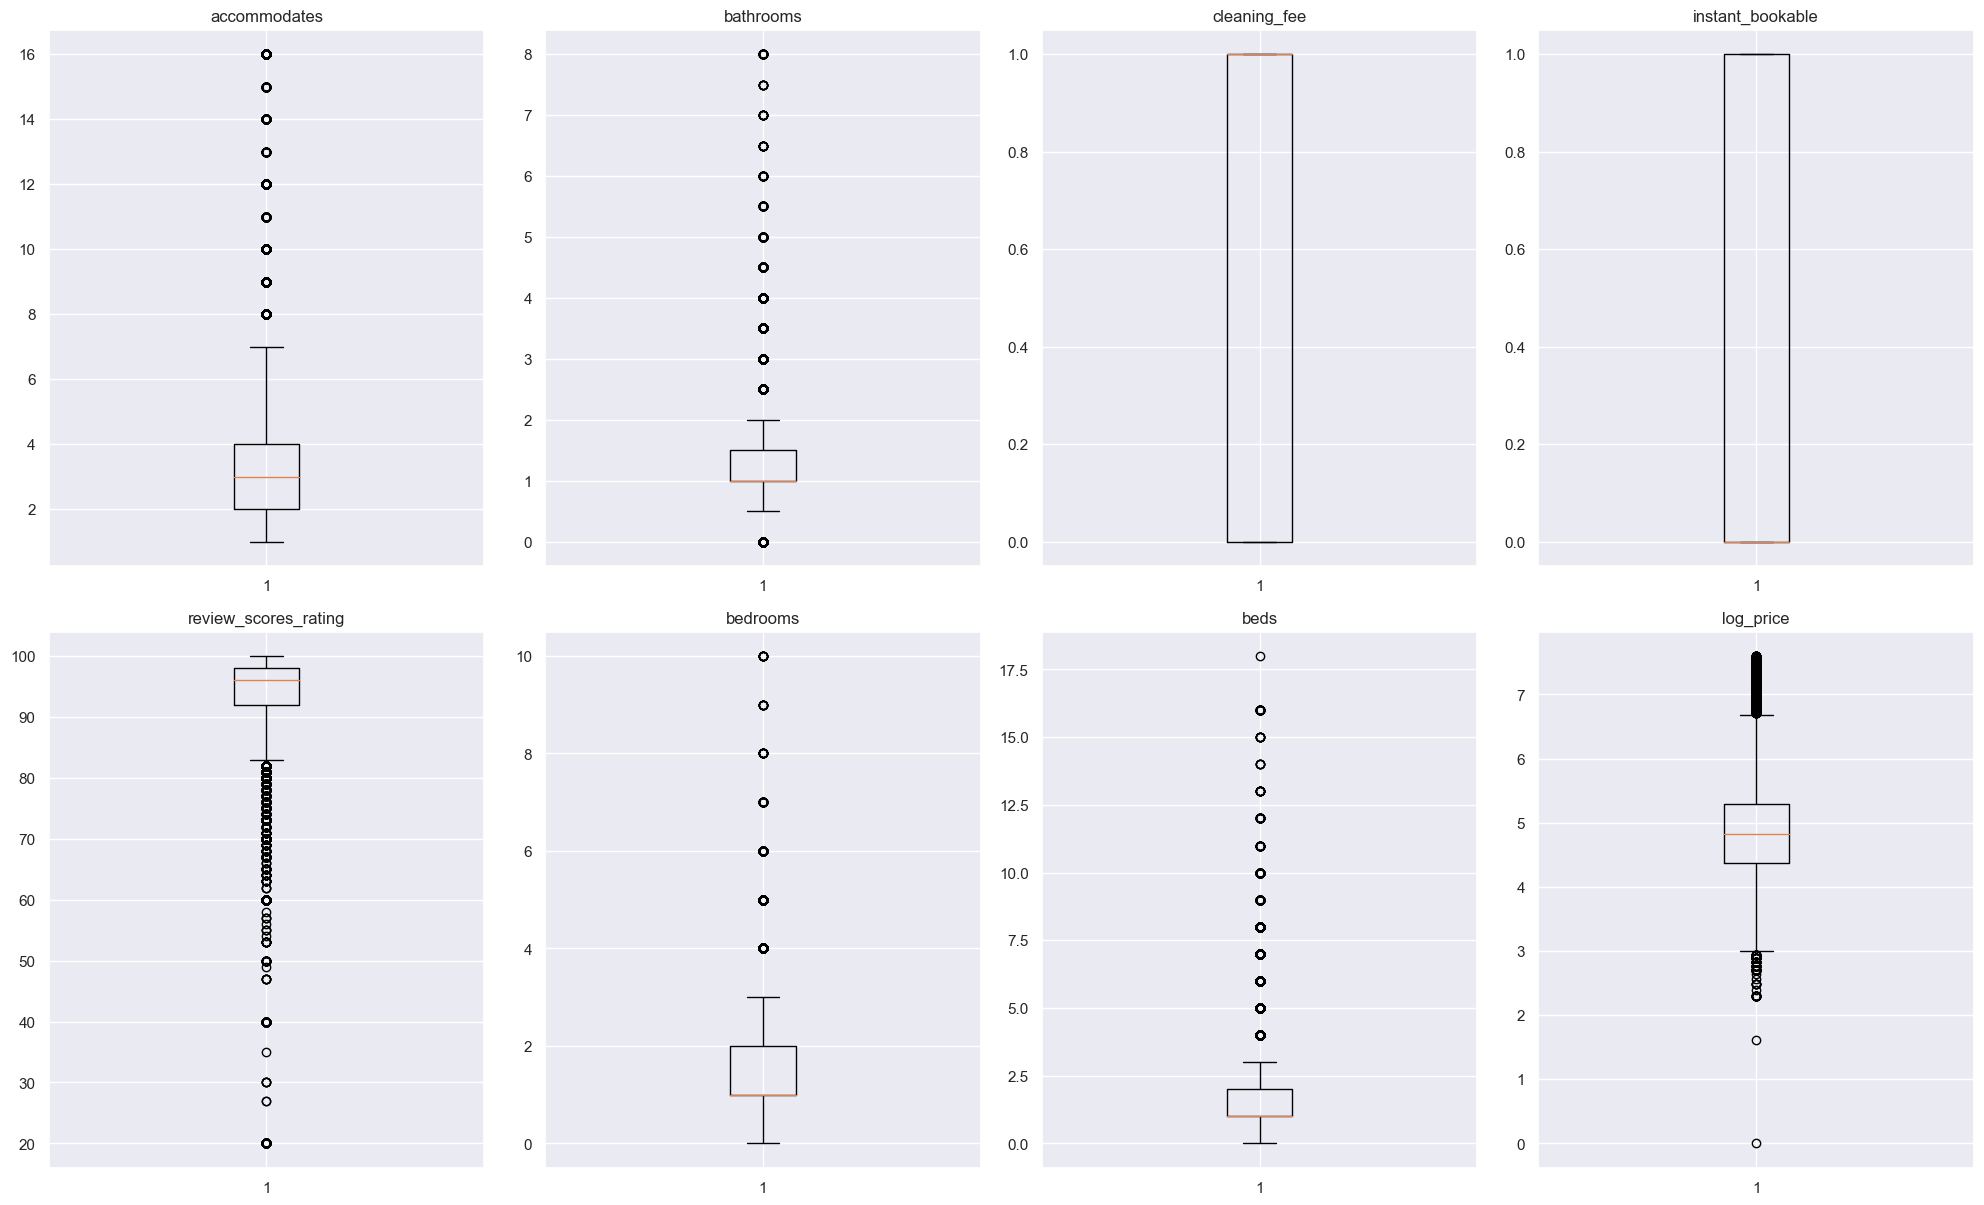

In [116]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number)
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()   

### Outlier Treatment

- Let's treat all the outliers by flooring and capping.

In [120]:
def treat_outliers(df, col):
    """
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # complete the code for 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(
        df[col], Lower_Whisker, Upper_Whisker
    )  # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker
    # and all the values above upper_whishker will be assigned value of upper_Whisker
    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)
 
    return df        

In [122]:
# treating the outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)       

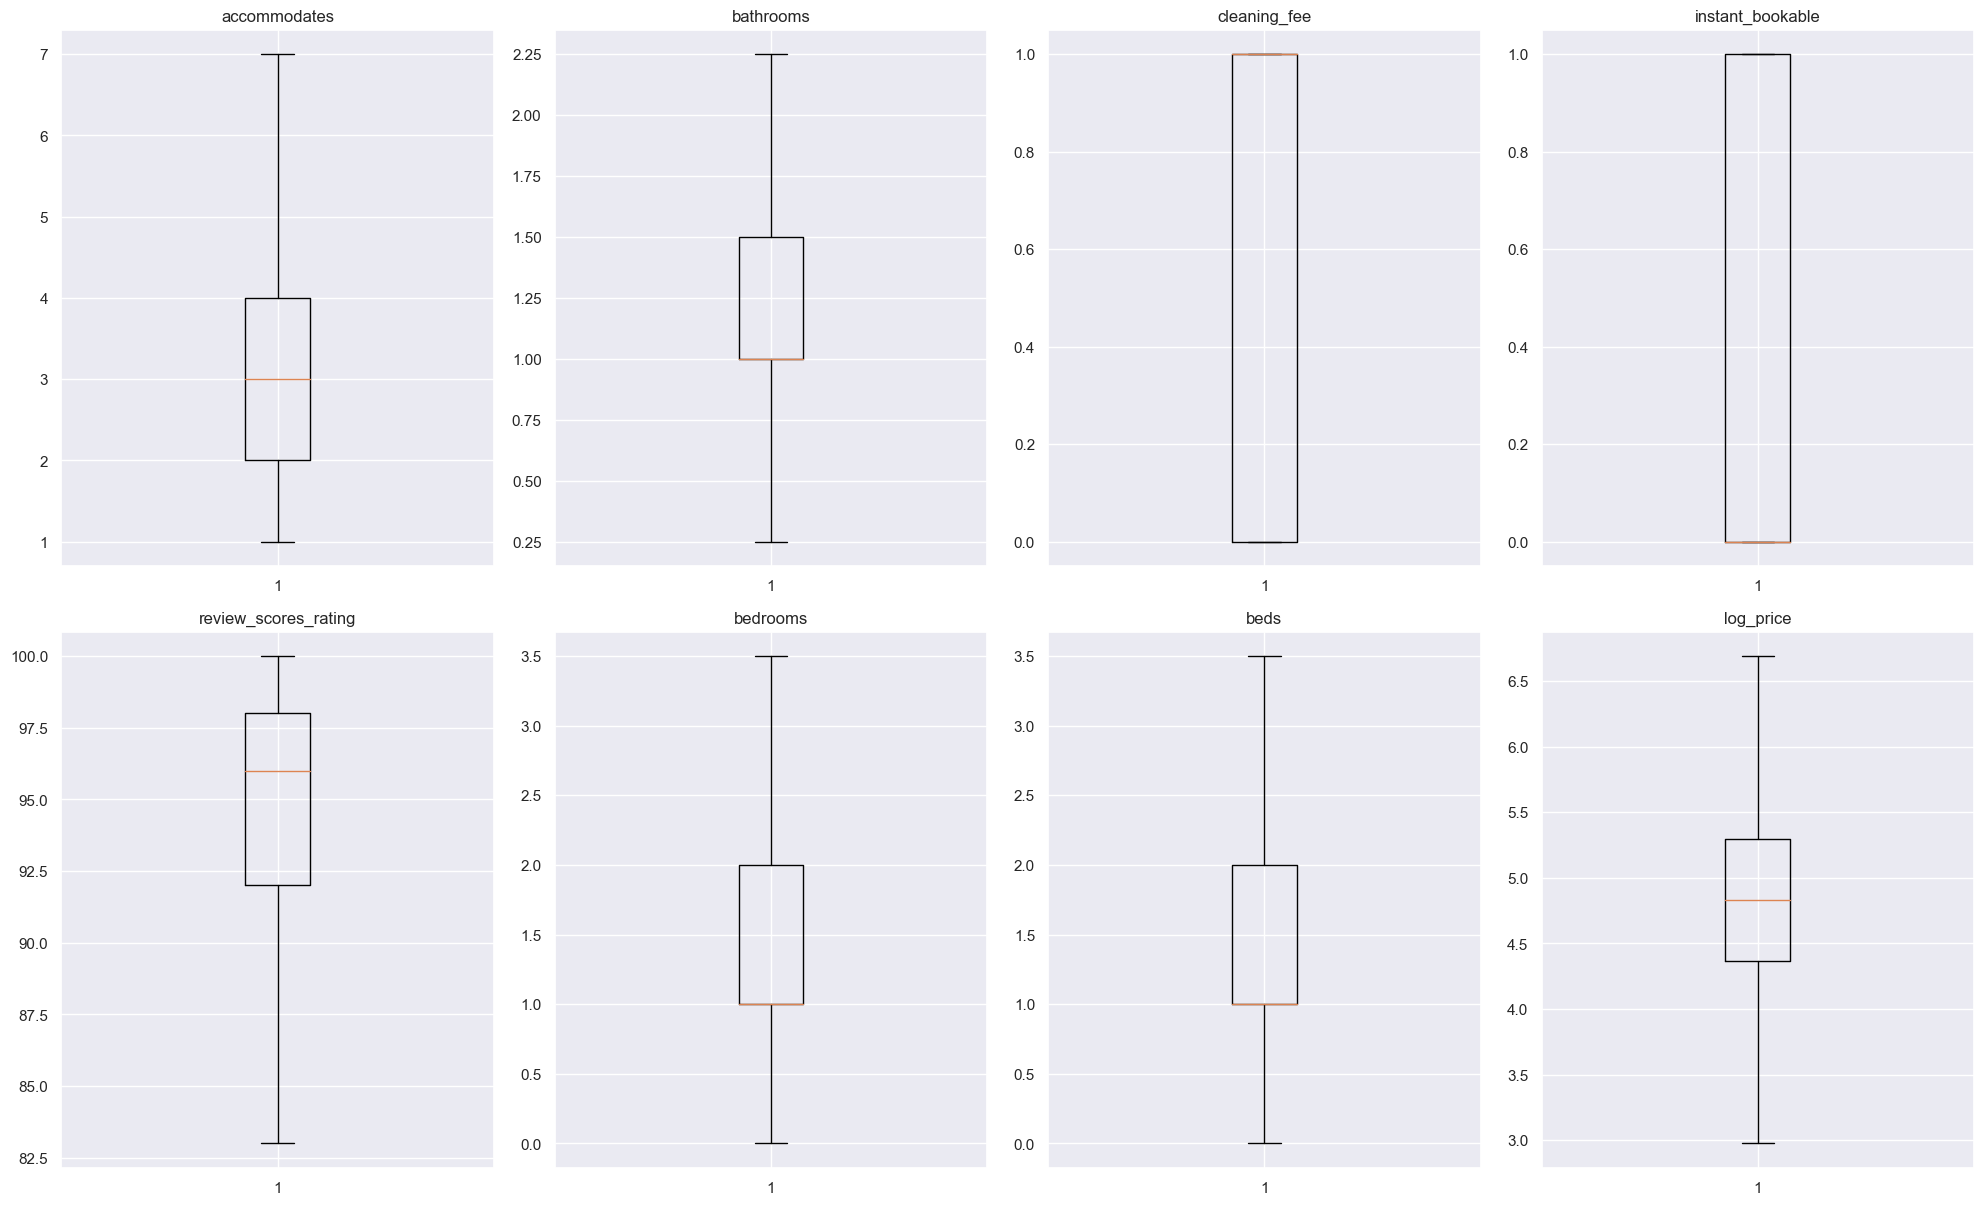

In [124]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()       

## Model Building - Linear Regression


### Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [126]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf       

1. We want to predict the log of rental price.

2. Before we proceed to build a model, we'll have to encode categorical features.

3. We'll split the data into train and test to be able to evaluate the model that we build on the train data.

4. We will build a Linear Regression model using the train data and then check it's performance.

### Data Preparation for modeling with log_price as Dependent variable

In [128]:
# defining the dependent and independent variables
X = df.drop(["log_price"], axis=1)
y = df["log_price"] # complete the code to set 'log_price' as the target variable   

In [132]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ## Complete the code to create dummies for independent features

X.head()  

,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict
0,3.0,1.0,1,0,100.0,1.0,1.0,0,0,0,1
1,7.0,1.0,1,1,93.0,3.0,3.0,0,0,0,1
2,5.0,1.0,1,1,92.0,1.0,3.0,0,0,1,0
3,4.0,1.0,1,0,96.0,2.0,2.0,0,0,0,0
4,2.0,1.0,1,1,83.0,0.0,1.0,0,0,1,0


In [136]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) ## Complete the code to split the data into train and test in specified ratio

In [138]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])   

Number of rows in train data = 37872
Number of rows in test data = 16232


### Model Building - Linear Regression with log_price as Dependent variable

In [142]:
# fitting the linear model
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)     

LinearRegression()

In [148]:
# Checking model performance on train set
lin_reg_model_perf_train = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_perf_train       

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.516014,0.399985,0.506181,0.506037,8.382339


In [152]:
# checking model performance on test set
print("Test Performance\n")
lin_reg_model_perf_test = model_performance_regression(lin_reg_model, x_test, y_test) ## Complete the code to check the performance on test data
lin_reg_model_perf_test        

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.51481,0.401757,0.515835,0.515506,8.424107


## Business Insights and Recommendations

-


___